In [16]:
# tutorial source = https://www.youtube.com/watch?v=-ApHWO1XMx0&t=2260s

!pip install pmdarima

from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

# supress warning
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = read_csv("/content/drive/My Drive/airline-passengers.csv", header=0, index_col=0, parse_dates=True)
series = df['Passengers']

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

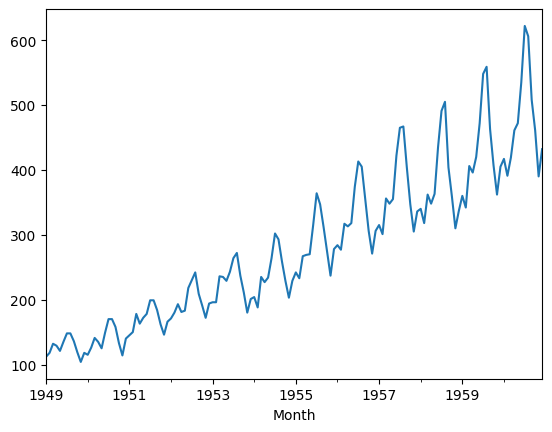

In [23]:
series.plot()

<Axes: xlabel='Month'>

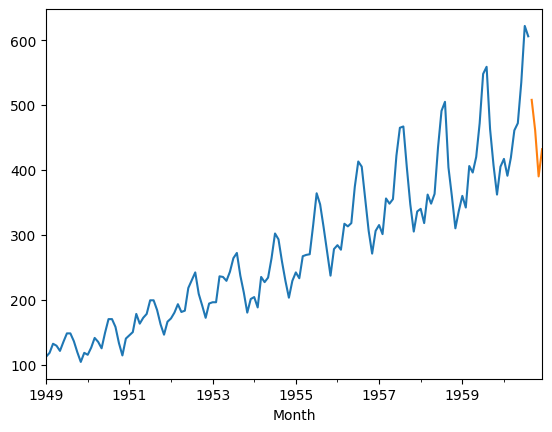

In [28]:
# split dataset

train, test = series[:140], series[140:]
n = len(series)
n_train = len(train)
n_test = len(test)

# plot ilustrasi perbandingan train dan test
fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [29]:
train.tail()

Month
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
Name: Passengers, dtype: int64

In [30]:
test.head()

Month
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

In [31]:
# create model

import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                            start_p=2,
                            start_q=0,
                            test="adf",
                            seasonal=True,
                            trace=True,
                            stepwise=False)
  return automodel

In [32]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1736.080, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1568.193, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1377.877, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1360.503, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1359.761, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1359.892, Time=0.26 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1340.424, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1364.799, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1354.208, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1354.391, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=1355.518, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[1] interc

In [33]:
# forecast

predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

1960-09-01    575.068635
1960-10-01    525.285415
1960-11-01    492.800914
1960-12-01    496.965886
Freq: MS, dtype: float64

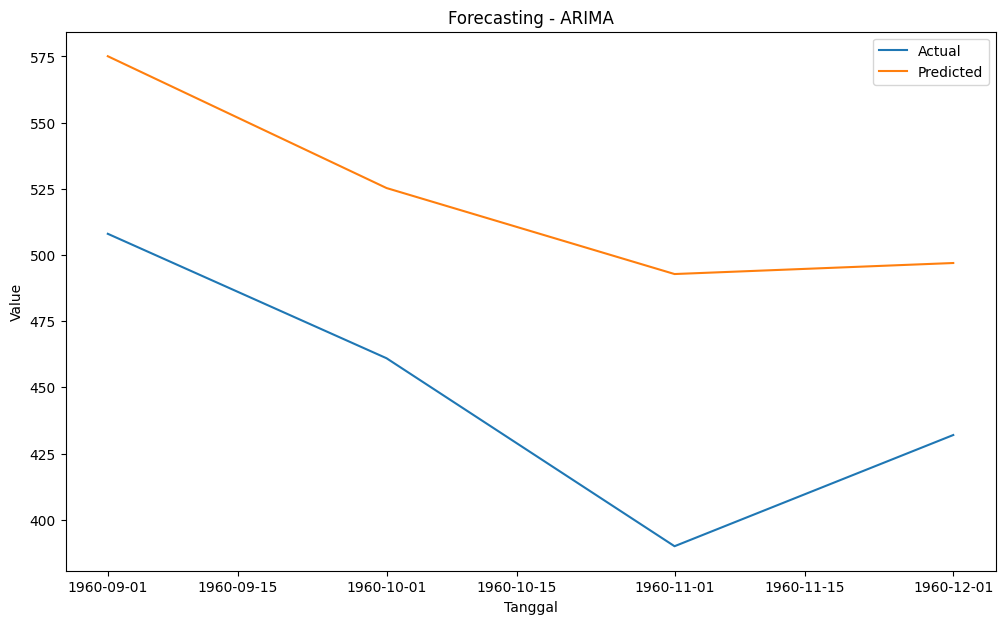

In [34]:
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting - ARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

In [35]:
# evaluate

rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 76.517
